### Bhagyashree Deshpande

# Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)df

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
wine_data = pd.read_csv('wine.csv')
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Data Understanding

In [3]:
wine_data.Type.unique()

array([1, 2, 3], dtype=int64)

In [4]:
wine_data.shape

(178, 14)

In [5]:
wine_1 = wine_data.drop('Type', axis = 1)
wine_1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
wine_1.shape

(178, 13)

In [7]:
wine_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
wine_1.dtypes

Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [9]:
wine_1.isna().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [10]:
wine_1.describe(include = 'all')

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [11]:
wine_1[wine_1.duplicated(keep = False)]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


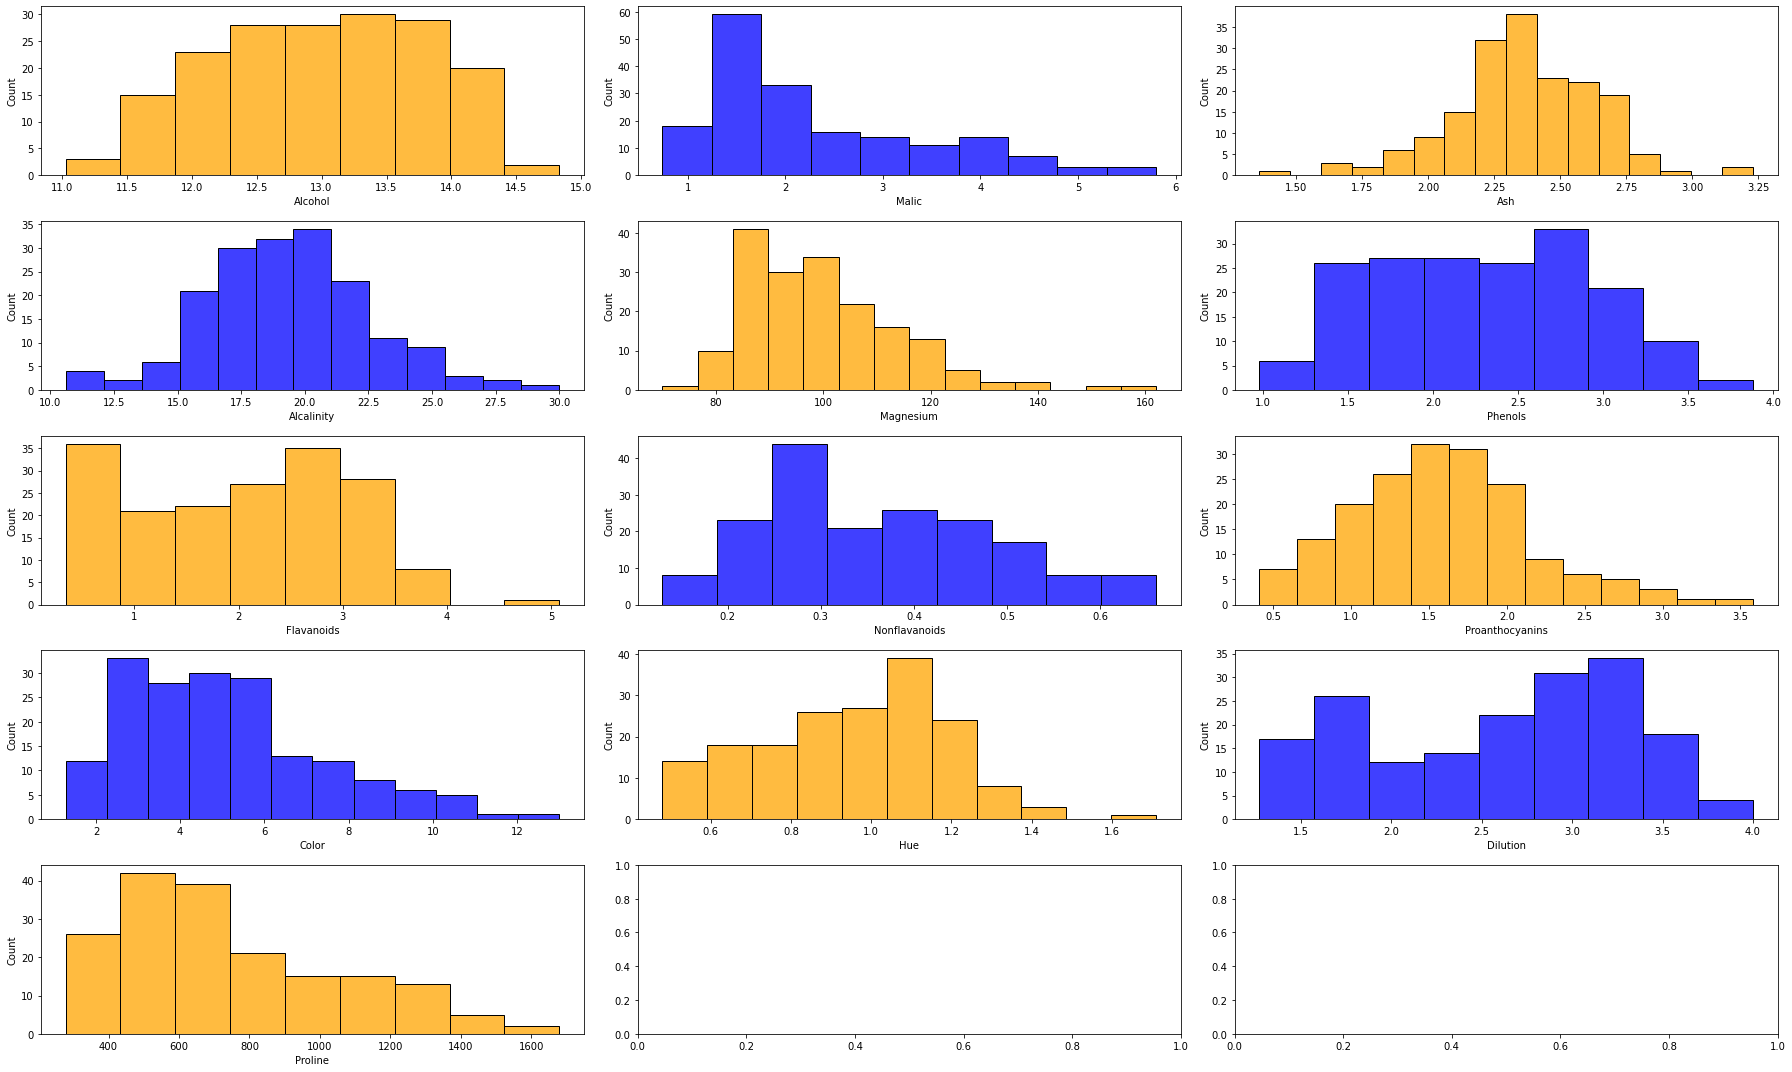

In [12]:
fig, ax = plt.subplots(5, 3, figsize = (25, 15))

sns.histplot(wine_1.Alcohol, ax = ax[0,0], color = 'orange')
sns.histplot(wine_1.Malic, ax = ax[0,1], color = 'b')
sns.histplot(wine_1.Ash, ax = ax[0,2], color = 'orange')
sns.histplot(wine_1.Alcalinity, ax = ax[1,0], color = 'b')
sns.histplot(wine_1.Magnesium, ax = ax[1,1], color = 'orange')
sns.histplot(wine_1.Phenols, ax = ax[1,2], color = 'b')
sns.histplot(wine_1.Flavanoids, ax = ax[2,0], color = 'orange')
sns.histplot(wine_1.Nonflavanoids, ax = ax[2,1], color = 'b')
sns.histplot(wine_1.Proanthocyanins, ax = ax[2,2], color = 'orange')
sns.histplot(wine_1.Color, ax = ax[3,0], color = 'b')
sns.histplot(wine_1.Hue, ax = ax[3,1], color = 'orange')
sns.histplot(wine_1.Dilution, ax = ax[3,2], color = 'b')
sns.histplot(wine_1.Proline, ax = ax[4,0], color = 'orange')

plt.tight_layout();

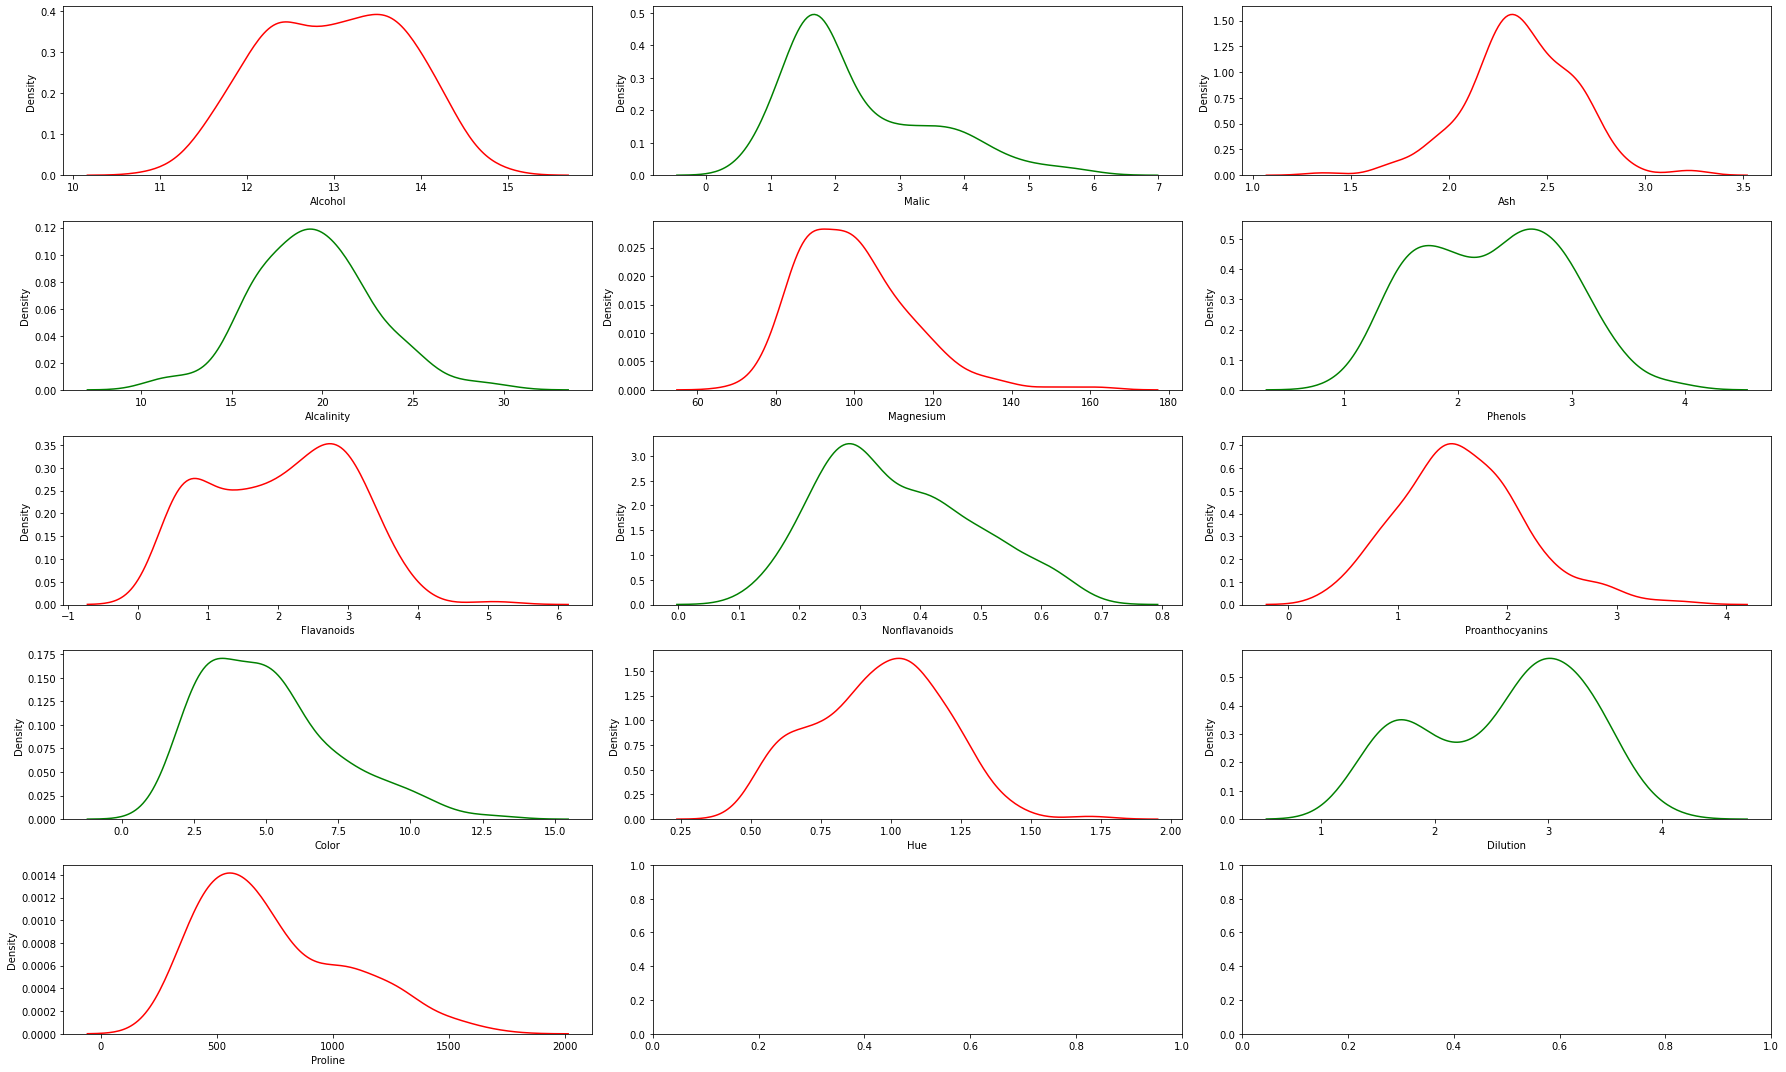

In [13]:
fig, ax = plt.subplots(5, 3, figsize = (25, 15))

sns.kdeplot(wine_1.Alcohol, ax = ax[0,0], color = 'r')
sns.kdeplot(wine_1.Malic, ax = ax[0,1], color = 'g')
sns.kdeplot(wine_1.Ash, ax = ax[0,2], color = 'r')
sns.kdeplot(wine_1.Alcalinity, ax = ax[1,0], color = 'g')
sns.kdeplot(wine_1.Magnesium, ax = ax[1,1], color = 'r')
sns.kdeplot(wine_1.Phenols, ax = ax[1,2], color = 'g')
sns.kdeplot(wine_1.Flavanoids, ax = ax[2,0], color = 'r')
sns.kdeplot(wine_1.Nonflavanoids, ax = ax[2,1], color = 'g')
sns.kdeplot(wine_1.Proanthocyanins, ax = ax[2,2], color = 'r')
sns.kdeplot(wine_1.Color, ax = ax[3,0], color = 'g')
sns.kdeplot(wine_1.Hue, ax = ax[3,1], color = 'r')
sns.kdeplot(wine_1.Dilution, ax = ax[3,2], color = 'g')
sns.kdeplot(wine_1.Proline, ax = ax[4,0], color = 'r')

plt.tight_layout();

In [14]:
wine_norm = scale(wine_1)
wine_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

### Performing Hierarchical Clustering using different types of linkage models

Here initially Hierarchical Clustering is performed on different types of linkage models and its performance is checked and then PCA is performed on it.

### Performing Simple Linkage Model

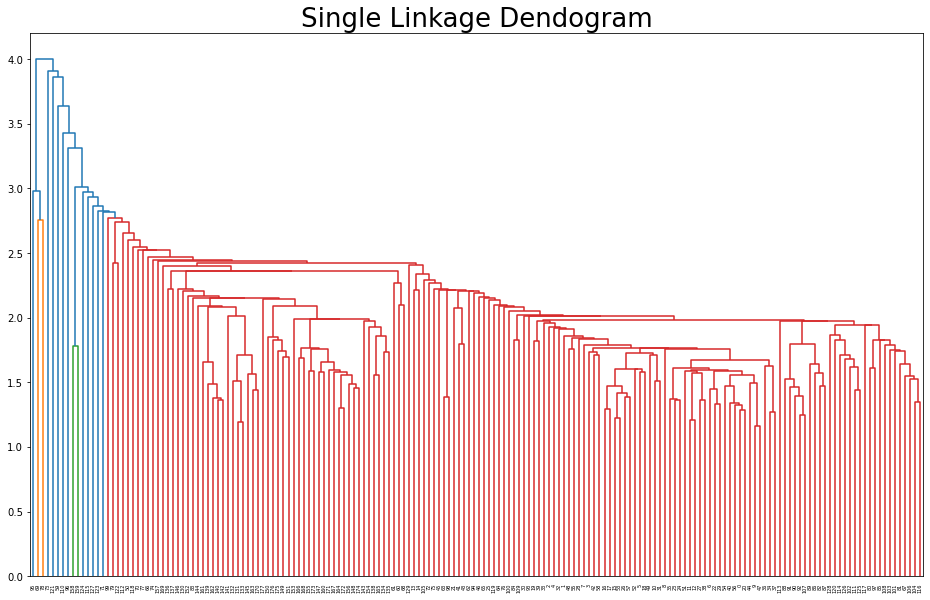

In [15]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(wine_norm, method = 'single'))
plt.title('Single Linkage Dendogram', size = 26);

In [16]:
hc_1 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')

In [17]:
y_hc_1 = hc_1.fit_predict(wine_norm)
clusters = pd.DataFrame(y_hc_1, columns = ['Clusters'])
wine_data['Cluster'] = y_hc_1

In [18]:
for i in range(2):
    print('Clusters     :', i)
    print('Total Values :', len(list(wine_data[wine_data['Cluster'] == i]['Type'].values)))

Clusters     : 0
Total Values : 175
Clusters     : 1
Total Values : 3


### Performing Complete Linkage Model

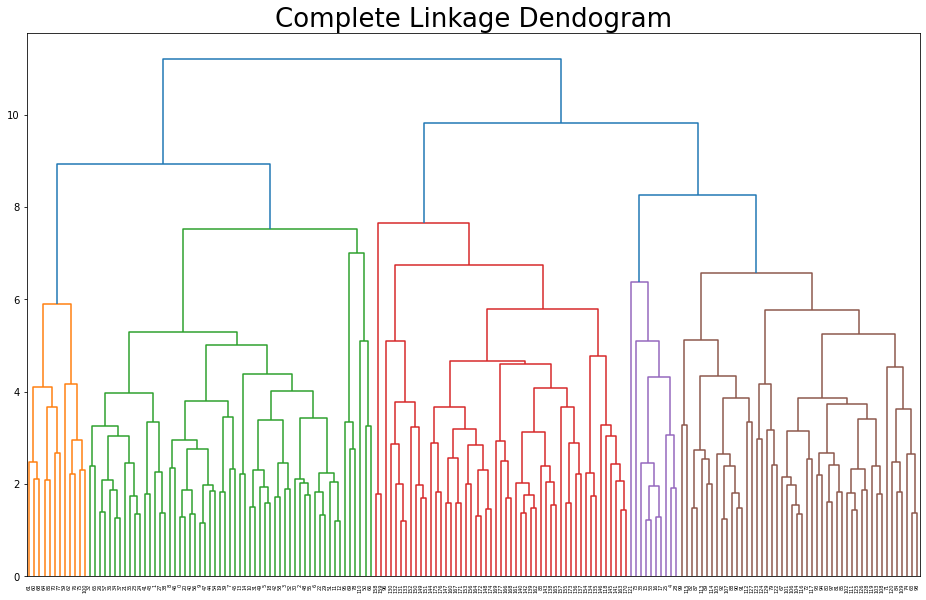

In [19]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(wine_norm, method = 'complete'))
plt.title('Complete Linkage Dendogram', size = 26);

In [20]:
hc_2 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')

In [21]:
y_hc_2 = hc_2.fit_predict(wine_norm)
clusters = pd.DataFrame(y_hc_2, columns = ['Clusters'])
wine_data['Cluster'] = y_hc_2

In [22]:
for i in range(4):
    print('Clusters     :', i)
    print('Total Values :', len(list(wine_data[wine_data['Cluster'] == i]['Type'].values)))

Clusters     : 0
Total Values : 58
Clusters     : 1
Total Values : 57
Clusters     : 2
Total Values : 51
Clusters     : 3
Total Values : 12


### Performing Average Linkage Model

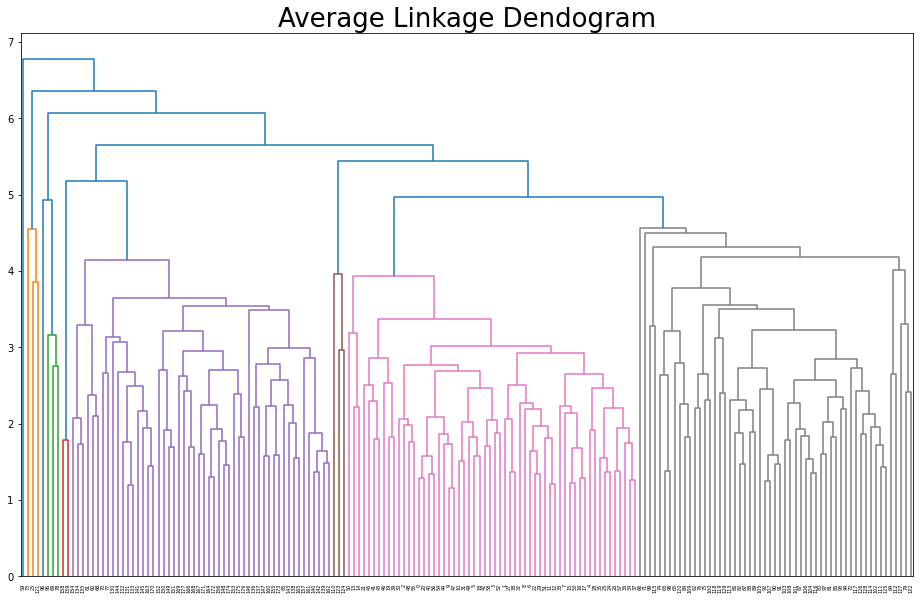

In [23]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(wine_norm, method = 'average'))
plt.title('Average Linkage Dendogram', size = 26);

In [24]:
hc_3 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')

In [25]:
y_hc_3 = hc_3.fit_predict(wine_norm)
clusters = pd.DataFrame(y_hc_3, columns = ['Clusters'])
wine_data['Cluster'] = y_hc_3

In [26]:
for i in range(5):
    print('Clusters     :', i)
    print('Total Values :', len(list(wine_data[wine_data['Cluster'] == i]['Type'].values)))

Clusters     : 0
Total Values : 116
Clusters     : 1
Total Values : 54
Clusters     : 2
Total Values : 3
Clusters     : 3
Total Values : 1
Clusters     : 4
Total Values : 4


### Performing Centroid(Ward) Linkage Model

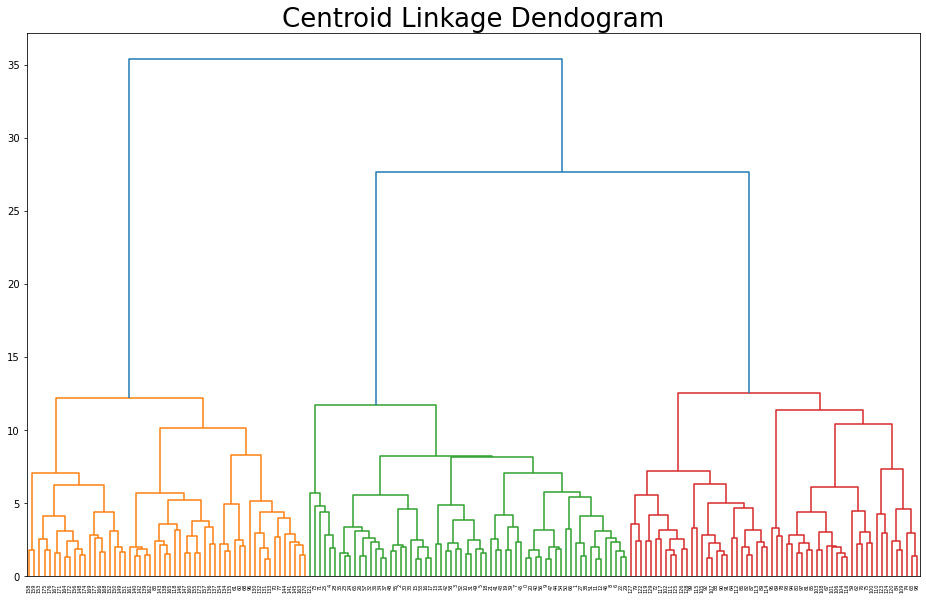

In [27]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(wine_norm, method = 'ward'))
plt.title('Centroid Linkage Dendogram', size = 26);

In [28]:
hc_4 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [29]:
y_hc_4 = hc_4.fit_predict(wine_norm)
clusters = pd.DataFrame(y_hc_4, columns = ['Clusters'])
wine_data['Cluster'] = y_hc_4

In [30]:
for i in range(3):
    print('Clusters     :', i)
    print('Total Values :', len(list(wine_data[wine_data['Cluster'] == i]['Type'].values)))

Clusters     : 0
Total Values : 58
Clusters     : 1
Total Values : 56
Clusters     : 2
Total Values : 64


### Performing KMeans Clustering

In [31]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(wine_norm)
    wcss.append(kmeans.inertia_)

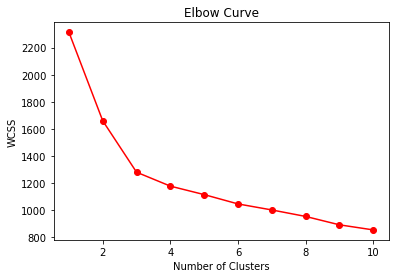

In [32]:
plt.plot(range(1, 11), wcss, 'bo-', color = 'r')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS');

#### From the above Elbow Curve we can say that we get 3 clusters.

In [33]:
clusters_newdata = KMeans(3, random_state = 45)
clusters_newdata.fit(wine_norm)

KMeans(n_clusters=3, random_state=45)

In [34]:
kmeans_label = clusters_newdata.labels_
wine_data['cluster'] = clusters_newdata.labels_

In [35]:
for i in range(3):
    print('Cluster      :', i)
    print('Total Values :', len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))

Cluster      : 0
Total Values : 62
Cluster      : 1
Total Values : 51
Cluster      : 2
Total Values : 65


### Evaluating Clustering methods with the help of Silhouette Score

The Silhouette Score metric calculates the goodness of the clustering techniques and it ranges from -1 to 1.

1 : means clusters are well apart from each other and clearly distinguished.

0 : means the distance between clusters is not significant.

-1 : means clusters are assigned in the wrong way.

In [36]:
silhouette_SLM = metrics.silhouette_score(wine_norm, y_hc_1)
silhouette_SLM

0.2224506072765093

In [37]:
silhouette_CLM = metrics.silhouette_score(wine_norm, y_hc_2)
silhouette_CLM

0.19382526203175696

In [38]:
silhouette_ALM = metrics.silhouette_score(wine_norm, y_hc_3)
silhouette_ALM

0.22945756295901437

In [39]:
silhouette_CenLM = metrics.silhouette_score(wine_norm, y_hc_4)
silhouette_CenLM

0.2774439826952265

In [40]:
silhouette_KMeans = metrics.silhouette_score(wine_norm, kmeans_label)
silhouette_KMeans

0.2848589191898987

In [41]:
table = {'Model' : pd.Series(['HC_Single_Linkage', 'HC_Complete_Linkage', 'HC_Average_Linkage', 'HC_Centroid_Linkage', 'KMeans']), 'Silhouette Score' : [silhouette_SLM, silhouette_CLM, silhouette_ALM, silhouette_CenLM,silhouette_KMeans]}
table = pd.DataFrame(table)
table

,Model,Silhouette Score
0,HC_Single_Linkage,0.222451
1,HC_Complete_Linkage,0.193825
2,HC_Average_Linkage,0.229458
3,HC_Centroid_Linkage,0.277444
4,KMeans,0.284859


## PCA Method

In order perform PCA we have first and foremost have to standardize or normalize the data in order to avoid variance between them.

In [42]:
pca = PCA()
pca_values = pca.fit_transform(wine_norm)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [43]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

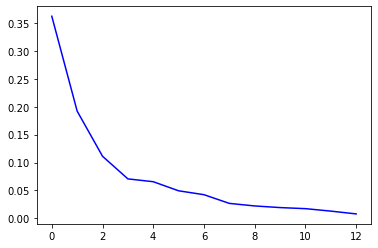

In [44]:
plt.plot(var, color = 'blue');

In [45]:
varc = np.cumsum(np.round(var, decimals = 4) * 100)
varc

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

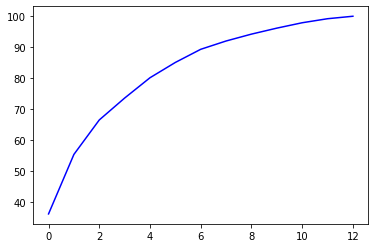

In [46]:
plt.plot(varc, color = 'b');

In [47]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [48]:
PCA_wine = pca_values[:,0:3]

## Now Building the Clustering Models with 3 PCA components

### Performing Simple Linkage Model on 3 components

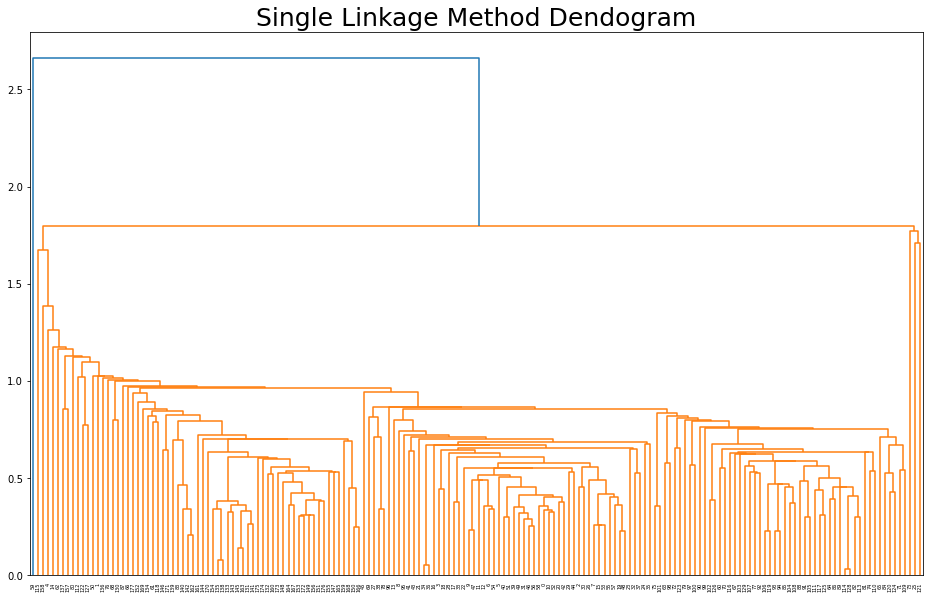

In [53]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(PCA_wine, method = 'single'))
plt.title('Single Linkage Method Dendogram', size = 25);

In [54]:
PCA_hc_1 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')

In [55]:
y_PCA_hc_1 = PCA_hc_1.fit_predict(PCA_wine)
clusters = pd.DataFrame(y_PCA_hc_1, columns = ['Clusters'])

wine_data['cluster'] = y_PCA_hc_1

In [56]:
for i in range(2):
    print('Clusters     :', i)
    print('Total Values :', len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))

Clusters     : 0
Total Values : 177
Clusters     : 1
Total Values : 1


### Performing Complete Linkage Model on 3 components

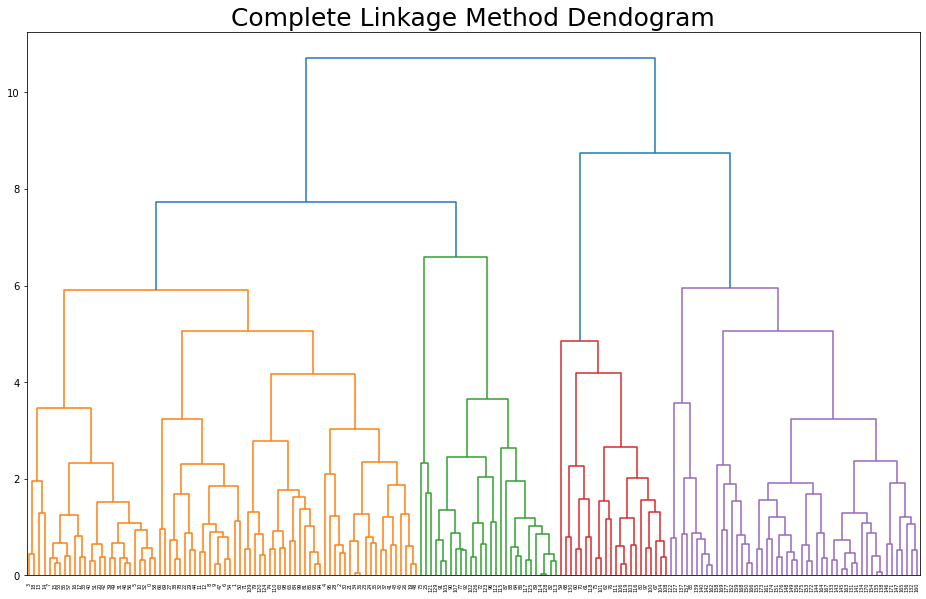

In [57]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(PCA_wine, method = 'complete'))
plt.title('Complete Linkage Method Dendogram', size = 25);

In [58]:
PCA_hc_2 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')

In [59]:
y_PCA_hc_2 = PCA_hc_2.fit_predict(PCA_wine)
clusters = pd.DataFrame(y_PCA_hc_2, columns = ['Clusters'])

wine_data['cluster'] = y_PCA_hc_2

In [60]:
for i in range(4):
    print('Clusters     :', i)
    print('Total Values :', len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))

Clusters     : 0
Total Values : 28
Clusters     : 1
Total Values : 50
Clusters     : 2
Total Values : 22
Clusters     : 3
Total Values : 78


### Performing Average Linkage Model on 3 Complete

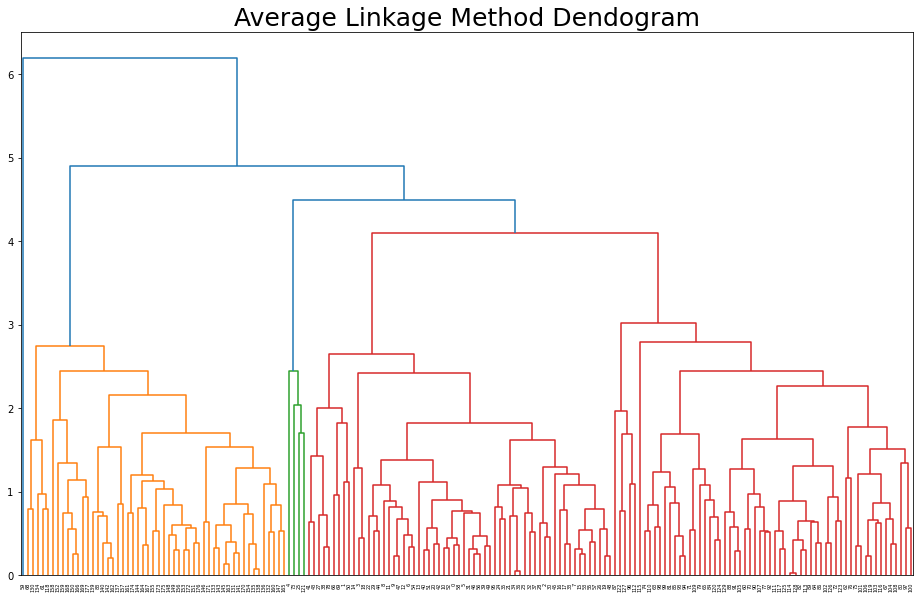

In [61]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(PCA_wine, method = 'average'))
plt.title('Average Linkage Method Dendogram', size = 25);

In [62]:
PCA_hc_3 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')

In [63]:
y_PCA_hc_3 = PCA_hc_3.fit_predict(PCA_wine)
clusters = pd.DataFrame(y_PCA_hc_3, columns = ['Clusters'])

wine_data['cluster'] = y_PCA_hc_3

In [64]:
for i in range(5):
    print('Clusters     :', i)
    print('Total Values :', len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))

Clusters     : 0
Total Values : 60
Clusters     : 1
Total Values : 61
Clusters     : 2
Total Values : 52
Clusters     : 3
Total Values : 1
Clusters     : 4
Total Values : 4


### Performing Centroid(Ward) Linkage Model on 3 Components

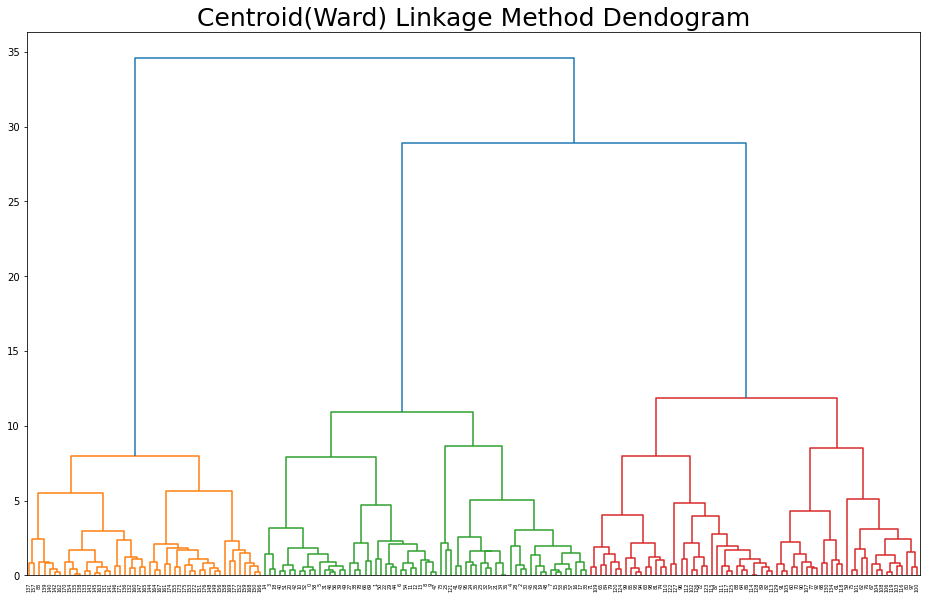

In [66]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(PCA_wine, method = 'ward'))
plt.title('Centroid(Ward) Linkage Method Dendogram', size = 25);

In [67]:
PCA_hc_4 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [68]:
y_PCA_hc_4 = PCA_hc_4.fit_predict(PCA_wine)
clusters = pd.DataFrame(y_PCA_hc_4, columns = ['Clusters'])

wine_data['cluster'] = y_PCA_hc_4

In [69]:
for i in range(3):
    print('Clusters     :', i)
    print('Total Values :', len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))

Clusters     : 0
Total Values : 66
Clusters     : 1
Total Values : 47
Clusters     : 2
Total Values : 65


### Performing KMeans Clustering on 3 Components

In [70]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(PCA_wine)
    wcss.append(kmeans.inertia_)

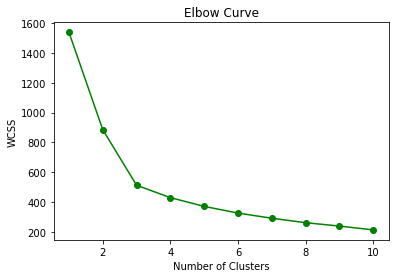

In [71]:
plt.plot(range(1,11), wcss, 'bo-', color = 'g')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS');

In [72]:
clusters_new = KMeans(3, random_state = 42)
clusters_new.fit(PCA_wine)

KMeans(n_clusters=3, random_state=42)

In [73]:
KMeans_pca_label = clusters_new.labels_
wine_data['clusters'] = clusters_new.labels_

In [74]:
for i in range(3):
    print('Clusters     :', i)
    print('Total Values :', len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))

Clusters     : 0
Total Values : 66
Clusters     : 1
Total Values : 47
Clusters     : 2
Total Values : 65


### Evaluating PCA Clustering methods with the help of Silhouette Score

The Silhouette Score metric calculates the goodness of the clustering techniques and it ranges from -1 to 1.

1 : means clusters are well apart from each other and clearly distinguished.

0 : means the distance between clusters is not significant.

-1 : means clusters are assigned in the wrong way.

In [80]:
PCA_silhouette_SLM = metrics.silhouette_score(PCA_wine, y_PCA_hc_1)
PCA_silhouette_SLM

0.36310673051041437

In [81]:
PCA_silhouette_CLM = metrics.silhouette_score(PCA_wine, y_PCA_hc_2)
PCA_silhouette_CLM

0.3578484268567307

In [82]:
PCA_silhouette_ALM = metrics.silhouette_score(PCA_wine, y_PCA_hc_3)
PCA_silhouette_ALM

0.44654492780235827

In [83]:
PCA_silhouette_CenLM = metrics.silhouette_score(PCA_wine, y_PCA_hc_4)
PCA_silhouette_CenLM

0.4459492198062967

In [84]:
PCA_silhouette_KMeans = metrics.silhouette_score(PCA_wine, KMeans_pca_label)
PCA_silhouette_KMeans

0.4537999848257614

In [85]:
table = {'Model' : pd.Series(['PCA_Single_Linkage', 'PCA_Complete_Linkage', 'PCA_Average_Linkage', 'PCA_Centroid_Linkage', 'PCA KMeans']), 'Silhouette Score' : [PCA_silhouette_SLM, PCA_silhouette_CLM, PCA_silhouette_ALM, PCA_silhouette_CenLM, PCA_silhouette_KMeans]}
table = pd.DataFrame(table)
table

,Model,Silhouette Score
0,PCA_Single_Linkage,0.363107
1,PCA_Complete_Linkage,0.357848
2,PCA_Average_Linkage,0.446545
3,PCA_Centroid_Linkage,0.445949
4,PCA KMeans,0.453800


In [87]:
final = {'Model_HC' : pd.Series(['HC_Single_Linkage', 'HC_Complete_Linkage', 'HC_Average_Linkage', 'HC_Centroid_Linkage', 'KMeans']), 'HC_Silhouette Score' : [silhouette_SLM, silhouette_CLM, silhouette_ALM, silhouette_CenLM,silhouette_KMeans], 'Model_PCA' : (['PCA_Single_Linkage', 'PCA_Complete_Linkage', 'PCA_Average_Linkage', 'PCA_Centroid_Linkage', 'PCA KMeans']), 'Silhouette Score' : [PCA_silhouette_SLM, PCA_silhouette_CLM, PCA_silhouette_ALM, PCA_silhouette_CenLM, PCA_silhouette_KMeans]}
final = pd.DataFrame(final)
final

,Model_HC,HC_Silhouette Score,Model_PCA,Silhouette Score
0,HC_Single_Linkage,0.363107,PCA_Single_Linkage,0.363107
1,HC_Complete_Linkage,0.357848,PCA_Complete_Linkage,0.357848
2,HC_Average_Linkage,0.446545,PCA_Average_Linkage,0.446545
3,HC_Centroid_Linkage,0.445949,PCA_Centroid_Linkage,0.445949
4,KMeans,0.453800,PCA KMeans,0.453800


## Conclusion

From the above table, it depicts that before performing PCA the cluster result is similar. But, after performing PCA, we gain a double silhohuette score, which means that the complexity or overlaping of data is decreased after performing PCA.